In [14]:
# imports 
import functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import ensemble, preprocessing, metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

In [2]:
x, y = functions.get_data(standard=False,minmax=True)

In [3]:
from sklearn.utils import resample
import copy

In [4]:
x.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income',
       'Years in current job', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Monthly Income',
       'Credit Ration per Year', 'Home Ownership_HaveMortgage',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Business Loan', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip',
       'Purpose_major_purchase', 'Purpose_moving', 'Purpose_other',
       'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding'],
      dtype='object')

In [5]:
#del x['Number of Credit Problems']
#del x['Bankruptcies']
#del x['Term']
# remove one hot encoding features
del x['Home Ownership_HaveMortgage']
del x['Home Ownership_Home Mortgage']
del x['Home Ownership_Own Home']
del x['Home Ownership_Rent']
del x['Purpose_Business Loan']
del x['Purpose_Buy House']
del x['Purpose_Buy a Car']
del x['Purpose_Debt Consolidation']
del x['Purpose_Educational Expenses']
del x['Purpose_Home Improvements']
del x['Purpose_Medical Bills']
del x['Purpose_Other']
del x['Purpose_Take a Trip']
del x['Purpose_major_purchase']
del x['Purpose_moving']
del x['Purpose_other']
del x['Purpose_renewable_energy']
del x['Purpose_small_business']
del x['Purpose_vacation']
del x['Purpose_wedding']
del x['Tax Liens']

In [6]:
df = copy.copy(x)
df['Loan Status'] = y

In [7]:
# Separate majority and minority classes
df_majority = df[df['Loan Status'] ==0]
df_minority = df[df['Loan Status'] ==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=7451,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['Loan Status'].value_counts()
# 1    7451
# 0    7451

1    7451
0    7451
Name: Loan Status, dtype: int64

In [8]:
# split dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(df_upsampled.drop(columns='Loan Status'), df_upsampled['Loan Status'], test_size=0.33, random_state=10)


In [9]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

9984
9984
4918
4918


In [10]:
###### Random forest ######
scores = []

forest = ensemble.RandomForestClassifier(n_estimators = 10, max_depth = 10)
#forest_fit = forest.fit(x_train, y_train)

# training - get results
scores.append(cross_val_score(forest, x_train, y_train, cv = 20))

In [20]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args

n_features = x_train.shape[1]

n_estimators = range(5, 100, 2)
max_depth = range(2, 50, 2)
max_features = range(2, n_features)
min_samples_split = range(2,100)
min_samples_leaf = range(2,100)

grid_params_nn = dict(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features,
                      min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

neigh_ins = RandomizedSearchCV(forest, grid_params_nn, cv=10, scoring='f1', n_iter=384, verbose=10, n_jobs=-1)

In [21]:
neigh_ins.fit(x_train, y_train.values.ravel())

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=384, n_jobs=-1,
          param_distributions={'n_estimators': range(5, 100, 2), 'max_depth': range(2, 50, 2), 'max_features': range(2, 15), 'min_samples_split': range(2, 100), 'min_samples_leaf': range(2, 100)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=10)

In [22]:
# get results
best_score = neigh_ins.best_score_
best_estimator = neigh_ins.best_estimator_
best_params = neigh_ins.best_params_

In [23]:
# write results to file
f = open("results/files/RandomForest_tuning_results.txt", "w+")

f.write("Best score = {0} \n".format(best_score))
f.write("Best estimator = {0} \n".format(best_estimator))
f.write("Best params = {0} \n".format(best_params))

f.close()

In [24]:
forest = ensemble.RandomForestClassifier(n_estimators = 45, max_depth = 9, max_features=5, min_samples_split=9, min_samples_leaf=24)
forest_fit = forest.fit(x_train, y_train)



In [25]:
###### Random forest -- Feature Importance ######

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, x_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Current Loan Amount (0.274355)
2. Credit Ration per Year (0.268964)
3. Credit Score (0.096154)
4. Monthly Income (0.076125)
5. Annual Income (0.045316)
6. Monthly Debt (0.045017)
7. Maximum Open Credit (0.036078)
8. Current Credit Balance (0.031941)
9. Years of Credit History (0.029786)
10. Term (0.029046)
11. Months since last delinquent (0.025010)
12. Number of Open Accounts (0.022950)
13. Years in current job (0.016793)
14. Number of Credit Problems (0.001864)
15. Bankruptcies (0.000603)


In [26]:
# predict
train_y_predicted = forest.predict(x_train)
test_y_predicted = forest.predict(x_test)

Training Accuracy: 0.7125400641025641
Testing Accuracy: 0.640097600650671
AUC: 0.6394422544668514
F1: 0.635196846824931


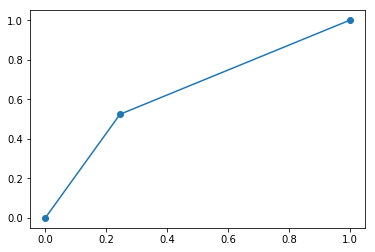

In [27]:
###### Random forest -- Evaluation ######

# accuracy
train_accuracy = metrics.accuracy_score(y_train, train_y_predicted)
test_accuracy = metrics.accuracy_score(y_test, test_y_predicted)
print("Training Accuracy: {0}".format(train_accuracy))
print("Testing Accuracy: {0}".format(test_accuracy))

# AUC index, excellent = 0.9~1, good = 0.8~0.9, soso = 0.7~0.8, not good = 0.6~0.7, bad = 0.6~0.7
# AUC is a good way for evaluation for binary classification problem
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_y_predicted)
auc = metrics.auc(fpr, tpr)
print("AUC: {0}".format(auc))

# F1
f1 = f1_score(y_test, test_y_predicted, average='weighted')
print("F1: {0}".format(f1))

# ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_y_predicted)
plt.plot(fpr,tpr,marker = 'o')
plt.show()

In [28]:
# write result to file
f = open("results/files/randomForest.txt", "w+")
f.write("Final F1 Score = {0} \n".format(f1))
f.write("Training Accuracy = {0} \n".format(train_accuracy))
f.write("Testing Accuracy = {0} \n".format(test_accuracy))
f.write("AUC = {0} \n".format(auc))
f.close()